# **Ahmed Nouralla - B19-CS-01 - a.shaaban@innopolis.university**
# **Machine Learning (F21) - Assignment 2**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## **Practical Task 1 (Ensemble Learning)**

### **Data Exploration**

In [ ]:
df = pd.read_csv('./android_traffic.csv')
df.describe()

,tcp_packets,dist_port_tcp,external_ips,vulume_bytes,udp_packets,source_app_packets,remote_app_packets,source_app_bytes,remote_app_bytes,source_app_packets.1,dns_query_times
count,7845.000000,7845.000000,7845.000000,7.845000e+03,7845.000000,7845.000000,7845.000000,7.845000e+03,7.845000e+03,7845.000000,7845.000000
mean,147.578713,7.738177,2.748502,1.654375e+04,0.056724,152.911918,194.706310,2.024967e+05,1.692260e+04,152.911918,4.898917
std,777.920084,51.654222,2.923005,8.225650e+04,1.394046,779.034618,1068.112696,1.401076e+06,8.238182e+04,779.034618,18.900478
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000e+00,6.900000e+01,1.000000,0.000000
25%,6.000000,0.000000,1.000000,8.880000e+02,0.000000,7.000000,7.000000,9.340000e+02,1.046000e+03,7.000000,1.000000
50%,25.000000,0.000000,2.000000,3.509000e+03,0.000000,30.000000,24.000000,4.090000e+03,3.803000e+03,30.000000,3.000000
75%,93.000000,0.000000,4.000000,1.218900e+04,0.000000,98.000000,92.000000,2.624400e+04,1.261000e+04,98.000000,5.000000
max,37143.000000,2167.000000,43.000000,4.226790e+06,65.000000,37150.000000,45928.000000,6.823516e+07,4.227323e+06,37150.000000,913.000000


In [ ]:
df

,tcp_packets,dist_port_tcp,external_ips,vulume_bytes,udp_packets,source_app_packets,remote_app_packets,source_app_bytes,remote_app_bytes,source_app_packets.1,dns_query_times,type
0,36,6,3,3911,0,39,33,5100,4140,39,3,benign
1,117,0,9,23514,0,128,107,26248,24358,128,11,benign
2,196,0,6,24151,0,205,214,163887,24867,205,9,benign
3,6,0,1,889,0,7,6,819,975,7,1,benign
4,6,0,1,882,0,7,6,819,968,7,1,benign
...,...,...,...,...,...,...,...,...,...,...,...,...
7840,0,0,0,0,0,2,2,257,143,2,2,malicious
7841,4,4,1,296,0,5,1,86,382,5,1,malicious
7842,0,0,0,0,0,2,2,257,143,2,2,malicious
7843,0,0,0,0,0,2,2,257,143,2,2,malicious


In [ ]:
df.type.value_counts()

benign       4704
malicious    3141
Name: type, dtype: int64

In [ ]:
df.dtypes

tcp_packets              int64
dist_port_tcp            int64
external_ips             int64
vulume_bytes             int64
udp_packets              int64
source_app_packets       int64
remote_app_packets       int64
source_app_bytes         int64
remote_app_bytes         int64
source_app_packets.1     int64
dns_query_times          int64
type                    object
dtype: object

In [ ]:
df.isna().sum() / df.count()

tcp_packets             0.0
dist_port_tcp           0.0
external_ips            0.0
vulume_bytes            0.0
udp_packets             0.0
source_app_packets      0.0
remote_app_packets      0.0
source_app_bytes        0.0
remote_app_bytes        0.0
source_app_packets.1    0.0
dns_query_times         0.0
type                    0.0
dtype: float64

AxesSubplot(0.125,0.125;0.62x0.755)


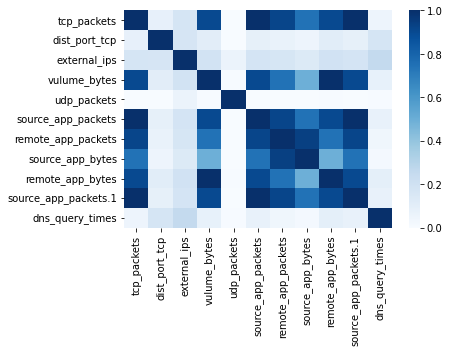

In [ ]:
import seaborn as sns
corr = df.corr()
print(sns.heatmap(corr, cmap="Blues"))

**Observations**:
1. Data represents information about packets sent by some android applications labeled with a `type` value that can be `malicious` or `benign` 
2. Dataset contains 11 numerical (integer-valued) features, no null values, and many correlated features.
3. Data is a little bit biased towards 'benign' apps.


### **Train-Test Splitting**

In [ ]:
from sklearn.model_selection import train_test_split

x = df.drop('type', axis=1)
y = df['type']
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, stratify=y, random_state=0)

### **Ensemble Learning**


In [ ]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

est = {}
est[0] = (RandomForestClassifier(random_state=0, max_depth=15), 'Random Forest Classifier')
est[1] = (BaggingClassifier(random_state=0, base_estimator=DecisionTreeClassifier(max_depth=15)), 'Bagging Classifier')
est[2] = (AdaBoostClassifier(random_state=0, base_estimator=DecisionTreeClassifier(max_depth=15)), 'AdaBoost Classifier')

for i in range(3):
  est[i][0].fit(x_train, y_train)
  print(f"{est[i][1]} score = {accuracy_score(y_test, est[i][0].predict(x_test))}")

Random Forest Classifier score = 0.8891013384321224
Bagging Classifier score = 0.8776290630975143
AdaBoost Classifier score = 0.8992989165073295


### **Fine-Tuning Hyper-parameters using `GridSearchCV`**

In [ ]:
from sklearn.model_selection import GridSearchCV
import multiprocessing

grid = [{
    'n_estimators':  [1000, 1500, 2000],
    'max_features':  ['sqrt', 'log2'],
    'min_impurity_decrease':  list(np.linspace(0, 1, 5)),
},
{
    'n_estimators':  [200, 250, 300],
    'base_estimator__max_features':  ['sqrt', 'log2'],
    'base_estimator__min_impurity_decrease':  list(np.linspace(0, 1, 5)),
},
{
    'n_estimators':  [200, 250, 300],
    'base_estimator__max_features':  ['sqrt', 'log2'],
    'base_estimator__min_impurity_decrease':  list(np.linspace(0, 1, 5)),
}]

gs = {}
be = {}
for i in range(3):
  gs[i] = GridSearchCV(estimator=est[i][0],
               param_grid=grid[i],
               scoring='accuracy',
               verbose=1,
               n_jobs=multiprocessing.cpu_count()-1)
  gs[i].fit(x_train, y_train)
  be[i] = gs[i].best_estimator_

for i in range(3):
  print(f"{est[i][1]} best parameters: {gs[i].best_params_}")
  print(f"{est[i][1]} accuracy: {accuracy_score(y_test, be[i].predict(x_test))}")

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Random Forest Classifier best parameters: {'max_features': 'sqrt', 'min_impurity_decrease': 0.0, 'n_estimators': 1500}
Random Forest Classifier accuracy: 0.8884639898024219
Bagging Classifier best parameters: {'base_estimator__max_features': 'sqrt', 'base_estimator__min_impurity_decrease': 0.0, 'n_estimators': 300}
Bagging Classifier accuracy: 0.8852772466539197
AdaBoost Classifier best parameters: {'base_estimator__max_features': 'sqrt', 'base_estimator__min_impurity_decrease': 0.0, 'n_estimators': 250}
AdaBoost Classifier accuracy: 0.8935627788400254


**Observations**:
- Seems that all models performed almost equally, with AdaBoostClassifier being slightly better that the others even with less numebr of estimators, since it builds the model sequentially using information from previous ones.
- If we tuned `max_depth` parameter as well, it's expected that `BaggingClassifier` will have deepest base learner because it combines the results of many strong (deep) learners, unlike `AdaBoostClassifier` which combines weak learners.
- Lets create the model with best parameters we got from grid search and fine tune `max_depth` to see if our expectation was correct. 

In [ ]:
grid2 = [
    {'max_depth':  list(range(5, 26))},
    {'base_estimator__max_depth':  list(range(5, 26))},
    {'base_estimator__max_depth':  list(range(5, 26))}
]

gs2 = {}

for i in range(3):
  gs2[i] = GridSearchCV(estimator=be[i],
               param_grid=grid2[i],
               scoring='accuracy',
               verbose=1,
               n_jobs=multiprocessing.cpu_count()-1)
  gs2[i].fit(x_train, y_train)

for i in range(3):
  print(f"{est[i][1]} best parameters: {gs2[i].best_params_}")
  print(accuracy_score(y_test, gs2[i].best_estimator_.predict(x_test)))

Fitting 5 folds for each of 21 candidates, totalling 105 fits
Fitting 5 folds for each of 21 candidates, totalling 105 fits
Fitting 5 folds for each of 21 candidates, totalling 105 fits
Random Forest Classifier best parameters: {'max_depth': 20}
0.892925430210325
Bagging Classifier best parameters: {'base_estimator__max_depth': 23}
0.8954748247291269
AdaBoost Classifier best parameters: {'base_estimator__max_depth': 14}
0.8973868706182282


### Plotting (max_depth, accuracy) for each model

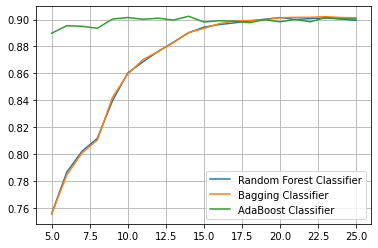

In [ ]:
for i in range(3):
  plt.plot(list(range(5, 26)), gs2[i].cv_results_['mean_test_score'], label=est[i][1])

plt.legend()
plt.grid()
plt.show()

**Observation:** 
- It seems that AdaBoostClassifier performed almost the same (or even better) on the test data than the other models, even with a shallower tree, which makes it the best candidate to choose for this task.

## **Practical Task 2 - CNN**

In [2]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.color import rgb2gray
from tensorflow.random import set_seed

# to get reproducible results with keras.
np.random.seed(0)
set_seed(0)

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


### Reading dataset from files

In [4]:
img_dir = './drive/MyDrive/gi4e_database/images/'
label_dir = './drive/MyDrive/gi4e_database/labels/'

img = {}  # img_name -> grayscale_img_array

for img_name in os.listdir(img_dir):
    img_path = img_dir + img_name
    img[img_name] = rgb2gray(plt.imread(img_path))

### Parsing coordinates for a sample image

Sample image shape: (600, 800)
Sample image data:
 [[0.9935556  0.99999994 0.914298   ... 0.39690393 0.38316706 0.3313306 ]
 [0.99496233 0.99999994 0.99999994 ... 0.39470944 0.3753616  0.322409  ]
 [0.72412825 0.8944302  0.99636114 ... 0.38406864 0.36780903 0.3386686 ]
 ...
 [0.6286416  0.58828706 0.5678082  ... 0.4172549  0.4155655  0.40883842]
 [0.58402234 0.5495616  0.50222    ... 0.4113839  0.4088612  0.40241686]
 [0.5215224  0.51762354 0.45545176 ... 0.4052302  0.40132353 0.39880076]]


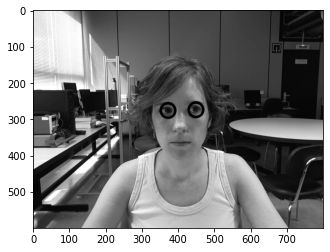

In [5]:
sample = '002_01.png'
sample_coords = open(label_dir + '002_image_labels.txt').read().split('\n')[0].split('\t')


# l_br : left eye, bottom-right boundary coordinates
l_br = (float(sample_coords[1]), float(sample_coords[2]))
l_c = (float(sample_coords[3]), float(sample_coords[4]))
l_tl = (float(sample_coords[5]), float(sample_coords[6]))
r_br = (float(sample_coords[7]), float(sample_coords[8]))
r_c = (float(sample_coords[9]), float(sample_coords[10]))
r_tl = (float(sample_coords[11]), float(sample_coords[12]))

print(f'Sample image shape: {img[sample].shape}')
print(f'Sample image data:\n {img[sample]}')

tmp = img[sample].copy()

# uncomment to draw eye corners, although it won't be clearly visible
# tmp = cv2.rectangle(img=tmp, pt1=l_br, pt2=l_tl, color=(0, 0), thickness=2)
# tmp = cv2.rectangle(img=tmp, pt1=r_br, pt2=r_tl, color=(0, 0), thickness=2)

# Circling iris
tmp = cv2.circle(img=tmp, center=(round(l_c[0]), round(l_c[1])), radius=20, color=(0, 0), thickness=5)
tmp = cv2.circle(img=tmp, center=(round(r_c[0]), round(r_c[1])), radius=20, color=(0, 0), thickness=5)

plt.imshow(tmp, cmap='gray')
plt.show()

### Constructing X, Y sets
- Let's do the same as we did for the sample image to create X, Y sets that will be later splitted into training and testing data.

In [38]:
# Generates a black image with white pixel on iris center given a sample (x, y) pair.
OFFSET = 5

def to_img(x, y):
    tmp = np.full((48, 48), 0.0)
    for i in range(round(y)-OFFSET, round(y)+OFFSET):
      for j in range(round(x)-OFFSET, round(x)+OFFSET):
        tmp[i][j] = 1
    
    return tmp

In [39]:
PAD = 20
X, Y = [], []

for img_name, img_arr in img.items():
    basename = img_name.split('.')[0]
    uid, iid = basename.split('_') # user_id and image_id
    img_coords = open(f"{label_dir}{uid}_image_labels.txt").read().split('\n')[int(iid)-1].split('\t')
    
    # Read coordinates
    l_br = (float(img_coords[1]), float(img_coords[2]))
    l_c = (float(img_coords[3]), float(img_coords[4]))
    l_tl = (float(img_coords[5]), float(img_coords[6]))
    r_br = (float(img_coords[7]), float(img_coords[8]))
    r_c = (float(img_coords[9]), float(img_coords[10]))
    r_tl = (float(img_coords[11]), float(img_coords[12]))

    # Add Padding
    l_br = (l_br[0]+PAD, l_br[1]-PAD)
    l_tl = (l_tl[0]-PAD, l_tl[1]+PAD)
    r_br = (r_br[0]+PAD, r_br[1]-PAD)
    r_tl = (r_tl[0]-PAD, r_tl[1]+PAD)

    # Calculating new iris center for cropped and resized images
    l_cn=((l_c[0]-l_tl[0])/(l_br[0]-l_tl[0])*48, (l_c[1]-l_br[1])/(l_tl[1]-l_br[1])*48)
    r_cn=((r_c[0]-r_tl[0])/(r_br[0]-r_tl[0])*48, (r_c[1]-r_br[1])/(r_tl[1]-r_br[1])*48)
    
    # Crop eye boundaries and resize image
    l_tmp = img_arr.copy()
    l_tmp = l_tmp[round(l_br[1]):round(l_tl[1]), round(l_tl[0]):round(l_br[0])]
    r_tmp = img_arr.copy()
    r_tmp = r_tmp[round(r_br[1]):round(r_tl[1]), round(r_tl[0]):round(r_br[0])]
    
    # Appending results to X, Y sets, X=eye_img, Y=iris_coords
    X.append(cv2.resize(l_tmp, (48, 48)))
    X.append(cv2.resize(r_tmp, (48, 48)))

    Y.append(to_img(round(l_cn[0]), round(l_cn[1])))
    Y.append(to_img(round(r_cn[0]), round(r_cn[1])))

### Plotting sample (x, y) pair

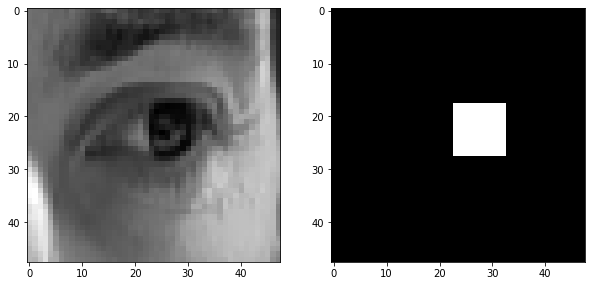

In [40]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(X[0], cmap='gray')

plt.subplot(1, 2, 2)
plt.imshow(Y[0], cmap='gray')
plt.show()

### Train-Test Splitting

In [41]:
from sklearn.model_selection import train_test_split

X = np.array(X).reshape(len(X), 48, 48)
Y = np.array(Y)

print(f"X shape: {X.shape}")
print(f"Y shape: {Y.shape}")

x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, random_state=0)

X shape: (2472, 48, 48)
Y shape: (2472, 48, 48)


### Building CNN Model

In [50]:
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Flatten, BatchNormalization, Dropout, Input, Concatenate, Conv2DTranspose

# Implementing the architecture from Figure 2
#
#             _____________________________
#            |                             |
#            |                             v
# input -> conv_1 -> conv_2 -> conv_3 -> conv_4 -> conv_5 -> out
#                       |
#                       |
#                        -------> aux_conv_1 -> aux_conv_2 -> aux_conv_3 -> aux_out

# out is the output image (black image with white pixels on iris center)
# aux_out is the reconstructed version of the original image

def build_model(x_train, y_train, x_val, y_val, params, verbose=0):

    input = Input(shape=(48, 48, 1), name='input')

    conv_1 = Conv2D(64, kernel_size=3, padding='same', activation=params['activation'], name='conv_1')(input)

    conv_2 = Conv2D(128, kernel_size=3, strides=2, padding='same', activation=params['activation'], name='conv_2')(conv_1)

    conv_3 = Conv2D(256, kernel_size=3, strides=2, padding='same', activation=params['activation'], name='conv_3')(conv_2)

    conv_4 = Concatenate(name='conv_4')([conv_1,
                            Conv2DTranspose(64, kernel_size=3, strides=4, padding='same', activation=params['activation'], name='temp')(conv_3)
                            ])

    conv_5 = Conv2D(64, kernel_size=3, padding='same', activation=params['activation'], name='conv_5')(conv_4)

    out = Conv2D(1, kernel_size=3, padding='same', activation=params['activation'], name='out')(conv_5)


    aux_conv_1 = Conv2D(256, kernel_size=3, strides=1, padding='same', activation=params['activation'], name='aux_conv_1')(conv_3)

    aux_conv_2 = Conv2DTranspose(128, kernel_size=3, strides=2, padding='same', activation=params['activation'], name='aux_conv_2')(aux_conv_1)
    
    aux_conv_3 = Conv2DTranspose(64, kernel_size=3, strides=2, padding='same', activation=params['activation'], name='aux_conv_3')(aux_conv_2)

    aux_out = Conv2D(1, kernel_size=3, padding='same', activation=params['activation'], name='aux_out')(aux_conv_3)

    model = Model(inputs=input, outputs={"out": out, "aux_out": aux_out})

    if verbose:
      model.summary()

    model.compile(optimizer=params['optimizer'], loss=params['loss'], loss_weights={"aux_out": 1.0, "out": 10.0})

    history = model.fit(x_train,
                        y={"aux_out": x_train, "out": y_train},
                        validation_data=(x_val, {"aux_out": x_val, "out": y_val}),
                        epochs=8,
                        batch_size=64,
                        verbose=verbose
                        )
    
    return history, model

_, model = build_model(x_train, y_train, x_test, y_test, {'optimizer': 'adam', 'loss': {"aux_out": "mse", "out": "mse"}, 'activation': 'relu'}, verbose=1)

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 48, 48, 1)]  0           []                               
                                                                                                  
 conv_1 (Conv2D)                (None, 48, 48, 64)   640         ['input[0][0]']                  
                                                                                                  
 conv_2 (Conv2D)                (None, 24, 24, 128)  73856       ['conv_1[0][0]']                 
                                                                                                  
 conv_3 (Conv2D)                (None, 12, 12, 256)  295168      ['conv_2[0][0]']                 
                                                                                            

### Hyper-parameter tuning

In [53]:
import talos as ta

p = {
    'optimizer':  ['sgd', 'adam', 'adamax', 'rmsprop'],
    'loss':  [{"aux_out": "mse", "out": "mse"}, {"aux_out": "mae", "out": "mae"}],
    'activation':  ['tanh', 'relu', 'sigmoid'],
}

t = ta.Scan(x_train, y_train, model=build_model, params=p, experiment_name='cnn')

100%|██████████| 24/24 [13:01<00:00, 32.57s/it]


In [54]:
t.data

,start,end,duration,round_epochs,loss,aux_out_loss,out_loss,val_loss,val_aux_out_loss,val_out_loss,activation,loss,optimizer
0,11/13/21-181036,11/13/21-181118,42.133424,8,0.423098,0.037632,0.038547,0.424894,0.038105,0.038679,tanh,"{'aux_out': 'mse', 'out': 'mse'}",sgd
1,11/13/21-181119,11/13/21-181201,42.303695,8,0.378833,0.003180,0.037565,0.378254,0.003071,0.037518,tanh,"{'aux_out': 'mse', 'out': 'mse'}",adam
2,11/13/21-181201,11/13/21-181243,42.307852,8,0.381218,0.003434,0.037778,0.381533,0.003494,0.037804,tanh,"{'aux_out': 'mse', 'out': 'mse'}",adamax
3,11/13/21-181244,11/13/21-181326,42.874066,8,0.408348,0.026914,0.038143,0.385348,0.003945,0.038140,tanh,"{'aux_out': 'mse', 'out': 'mse'}",rmsprop
4,11/13/21-181327,11/13/21-181352,24.881393,8,0.993071,0.155164,0.083791,1.330452,0.155029,0.117542,tanh,"{'aux_out': 'mae', 'out': 'mae'}",sgd
5,11/13/21-181352,11/13/21-181417,25.371156,8,0.483696,0.028173,0.045552,0.482386,0.033264,0.044912,tanh,"{'aux_out': 'mae', 'out': 'mae'}",adam
6,11/13/21-181417,11/13/21-181500,42.357435,8,0.597363,0.036743,0.056062,0.740938,0.036605,0.070433,tanh,"{'aux_out': 'mae', 'out': 'mae'}",adamax
7,11/13/21-181500,11/13/21-181543,42.935888,8,0.556305,0.082358,0.047395,0.586645,0.100473,0.048617,tanh,"{'aux_out': 'mae', 'out': 'mae'}",rmsprop
8,11/13/21-181543,11/13/21-181609,25.347666,8,0.390971,0.042494,0.034848,0.391919,0.043272,0.034865,relu,"{'aux_out': 'mse', 'out': 'mse'}",sgd
9,11/13/21-181609,11/13/21-181633,24.299651,8,0.180283,0.002192,0.017809,0.182538,0.002447,0.018009,relu,"{'aux_out': 'mse', 'out': 'mse'}",adam


**Observation**

- Smallest validation loss of 0.018009 (main network, 9th trial) was achieved with activation=`relu`, loss=`mse`, and optimizer=`adam` which happens to be the model we already tried before tuning.

### **Predictions for 10 test images**

	Test image	Reconstructed image	iris detection


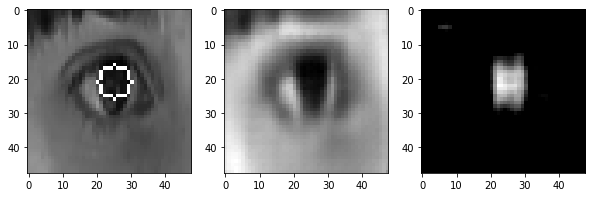

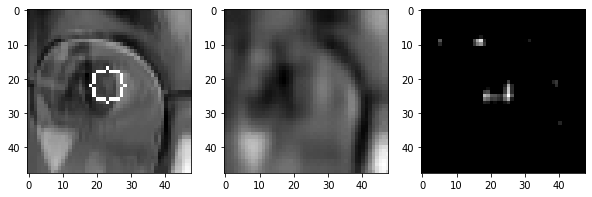

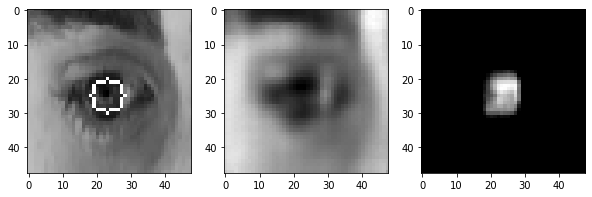

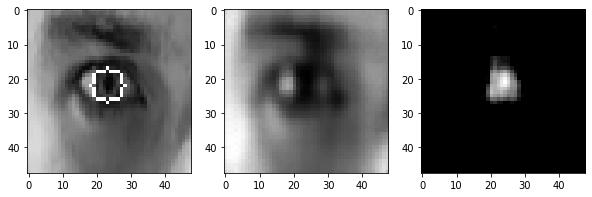

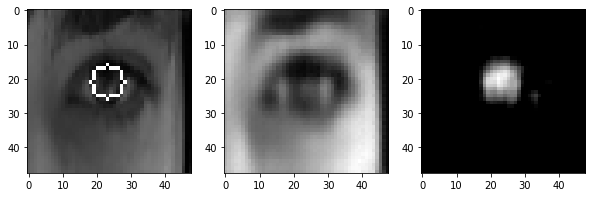

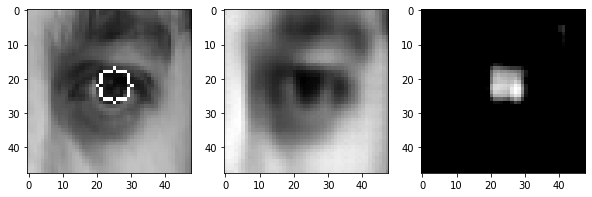

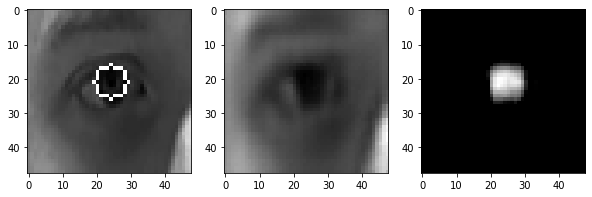

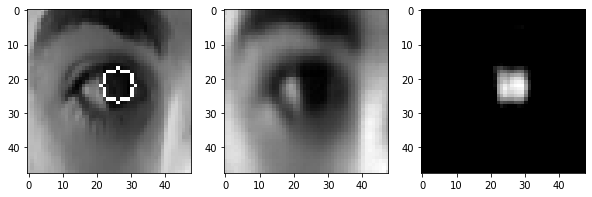

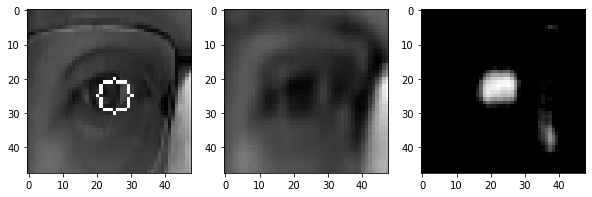

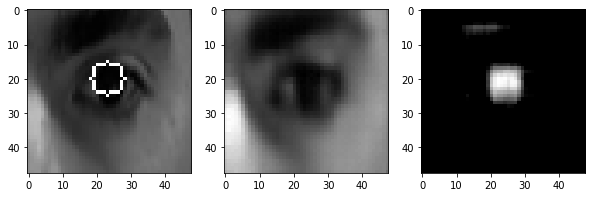

In [81]:
# takes the output iris detection image and extracts iris center coordinates

def get_iris_center(y):
  I = []
  J = []
  for i in range(48):
    for j in range(48):
      if y[i][j] > 0.2:  # to ignore noise
        I.append(i)
        J.append(j)
  return (round(np.mean(J)), round(np.mean(I)))


print('\tTest image\tReconstructed image\tiris detection')
for i in range(10):
    plt.figure(figsize=(10, 5))

    # Show a test image with iris location circled
    tmp = x_test[i].copy()
    pred = model.predict(np.expand_dims(x_test[i], axis=0))
    c = get_iris_center(pred['out'][0].squeeze())
    tmp = cv2.circle(img=tmp, center=c,
                     radius=5, color=(1, 1), thickness=1)
    plt.subplot(1, 3, 1)
    plt.imshow(tmp, cmap='gray')

    # Show the reconstructed image
    plt.subplot(1, 3, 2)
    tmp = pred["aux_out"][0].squeeze()
    plt.imshow(tmp, cmap='gray')
    
    # Show output image
    plt.subplot(1, 3, 3)
    tmp = pred["out"][0].squeeze()
    plt.imshow(tmp, cmap='gray')

    plt.show()

**Observation:**

- Model performes very well in most cases, except the ones when there are eyeglasses, that's why the paper suggested using a GAN to remove eyeglasses as a preprocessing step (but this is out of the scope of this assignment).